<a href="https://colab.research.google.com/github/Dhamo2005/Social-Media-Analysis/blob/main/Social_Meida_Engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Setup**

## Importing Dependencies

In [46]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [47]:
# Connect to the SQLite database
conn = sqlite3.connect("dataset.db")
query = "SELECT * FROM profile"  # Query the correct table
df = pd.read_sql_query(query, conn)
conn.close()

# --- Data Preprocessing ---
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

##Visualization Settings

In [48]:
# Set a consistent style for plots
sns.set(style="whitegrid")

#**Profile Analysis**

##Followers Count Trend

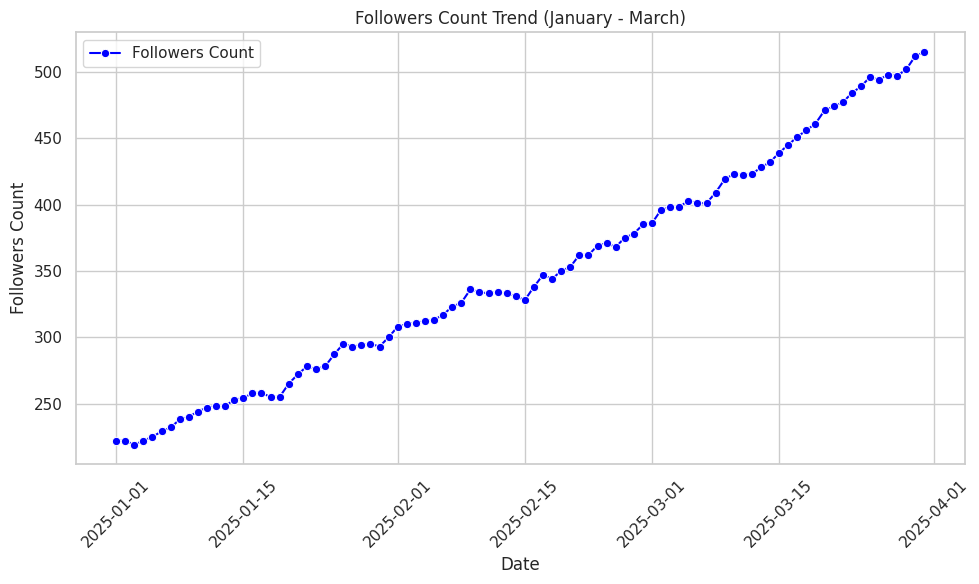

In [49]:
# --- Followers Count Trend ---
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Followers Count', marker='o', label='Followers Count', color='blue')
plt.title('Followers Count Trend (January - March)')
plt.xlabel('Date')
plt.ylabel('Followers Count')
plt.xticks(rotation=45)
plt.tight_layout()
# Save with higher DPI and tighter bounding box
plt.savefig('followers_count_trend.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

##Following Count Trend

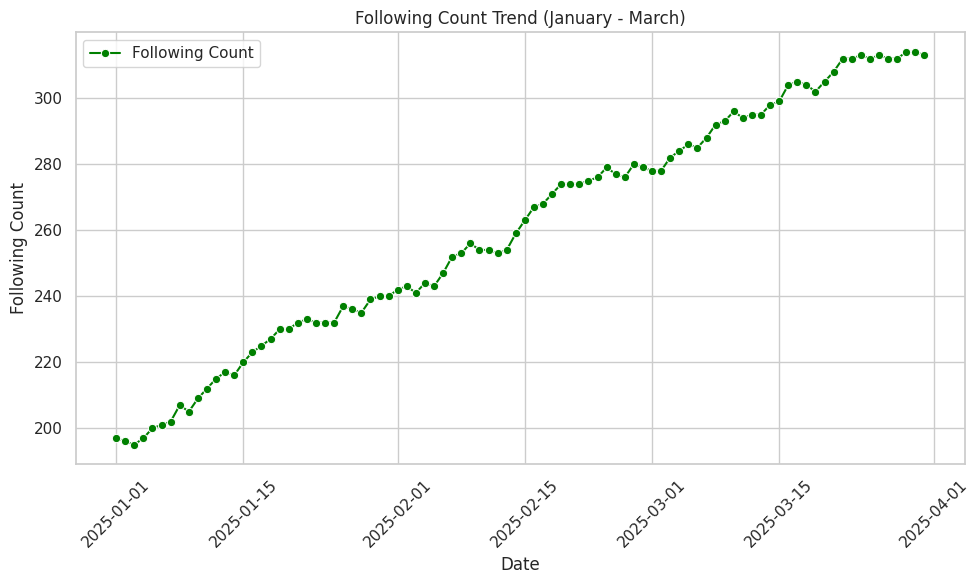

In [50]:
# --- Following Count Trend ---
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Following Count', marker='o', label='Following Count', color='green') # Updated label to Following Count
plt.title('Following Count Trend (January - March)')
plt.xlabel('Date')
plt.ylabel('Following Count')
plt.xticks(rotation=45)
plt.tight_layout()
# Save with higher DPI and tighter bounding box
plt.savefig('following_count_trend.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

##Followers and Following Trend

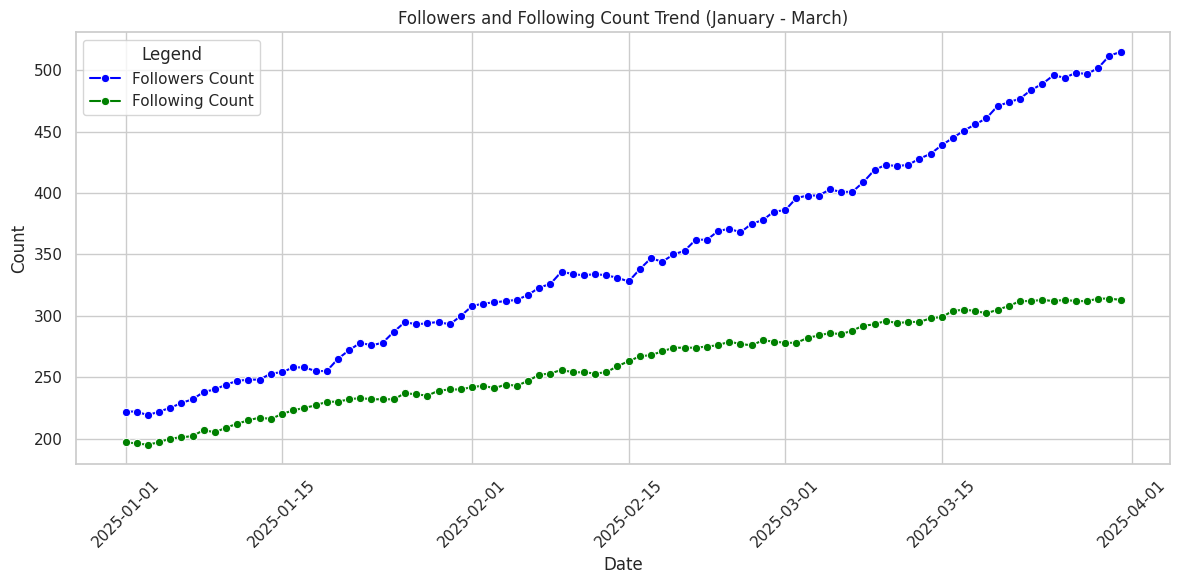

In [51]:
# Combined Followers and Following Count Trend (Line Chart)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Followers Count', marker='o', label='Followers Count', color='blue')
sns.lineplot(data=df, x='Date', y='Following Count', marker='o', label='Following Count', color='green')
plt.title('Followers and Following Count Trend (January - March)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Legend')
plt.tight_layout()
plt.show()

#**Interactions**



##Total Engagement Over the Week

In [54]:
# Query the interactions table
conn = sqlite3.connect("dataset.db")  # Reopen the connection
query = "SELECT * FROM interactions"
df = pd.read_sql_query(query, conn)
conn.close()  # Close the connection after querying

# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')

# Calculate total engagement
total_views = df['Views'].sum()
total_likes = df['Likes'].sum()
total_comments = df['Comments'].sum()

print(f"Engagement Over the Week:")
print(f"Total Views: {total_views}")
print(f"Total Likes: {total_likes}")
print(f"Total Comments: {total_comments}")

Engagement Over the Week:
Total Views: 50514
Total Likes: 8949
Total Comments: 1771


##Hourly Engagement Patterns

<Figure size 1200x600 with 0 Axes>

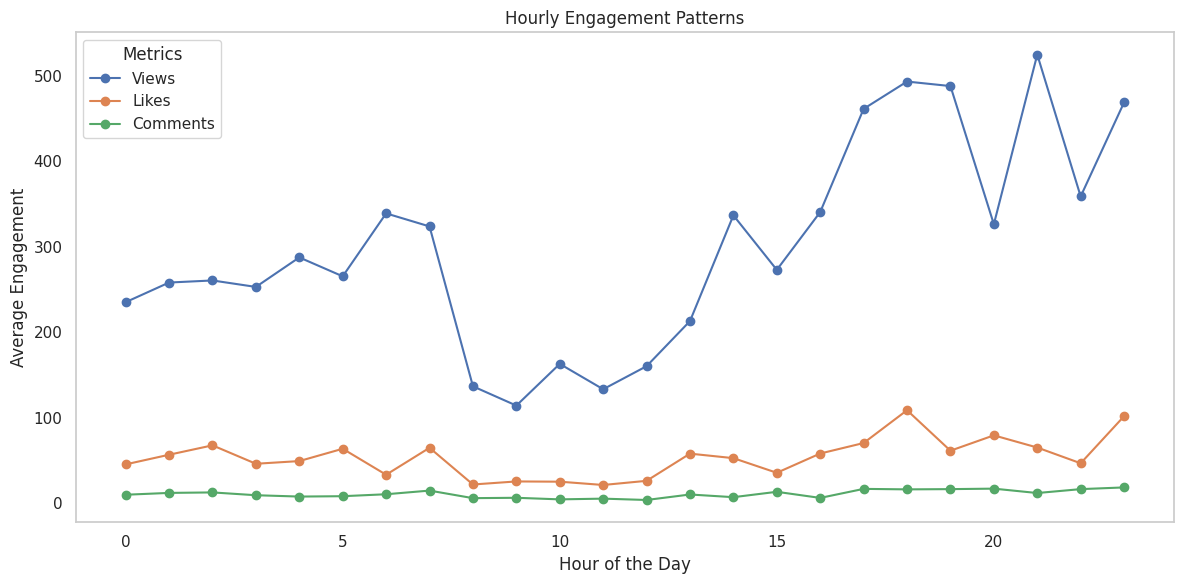

In [56]:
# Extract the hour from the timestamp
df['Hour'] = df['Timestamp'].dt.hour

# Group by hour and calculate the mean engagement
hourly_engagement = df.groupby('Hour')[['Views', 'Likes', 'Comments']].mean()

# Plot hourly engagement patterns
plt.figure(figsize=(12, 6))
hourly_engagement.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Hourly Engagement Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagement')
plt.legend(title='Metrics')
plt.grid()
plt.tight_layout()
plt.show()

##Peak Engagement Time

Hour with Highest Views: 09 PM
Hour with Highest Likes: 06 PM
Hour with Highest Comments: 11 PM


<Figure size 1200x600 with 0 Axes>

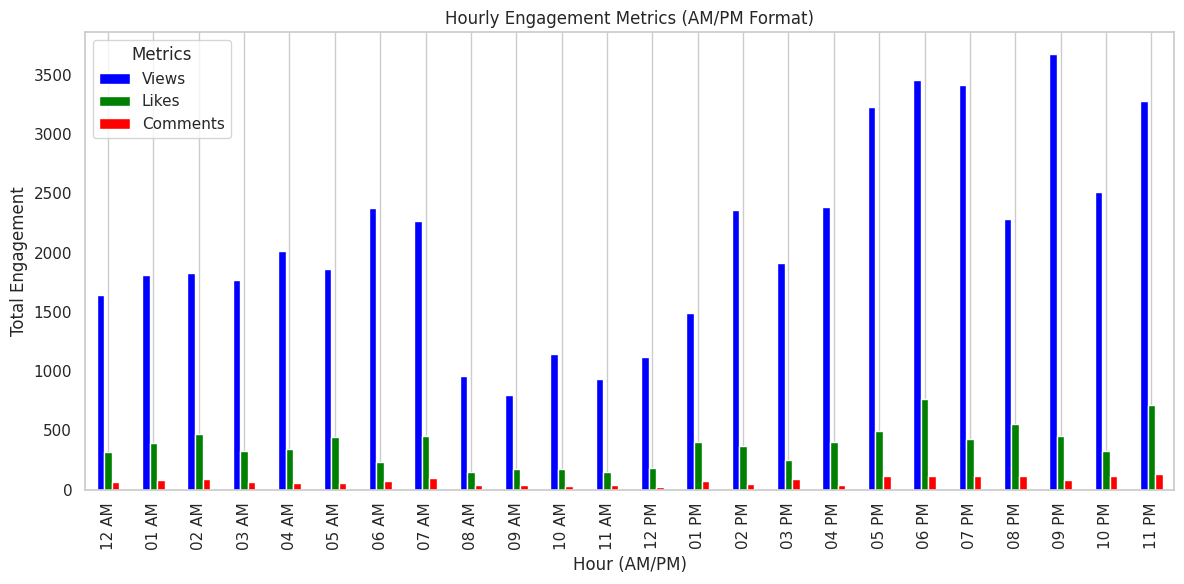

In [60]:
# Extract the hour in AM/PM format
df['Hour_AM_PM'] = df['Timestamp'].dt.strftime('%I %p')  # Format hour as 12-hour with AM/PM

# Group by Hour_AM_PM and calculate the total engagement metrics
hourly_engagement = df.groupby('Hour_AM_PM')[['Views', 'Likes', 'Comments']].sum()

# Sort the hours in chronological order
hourly_engagement = hourly_engagement.reindex(
    pd.date_range("00:00", "23:00", freq="h").strftime('%I %p'), fill_value=0
)

# Find the hour with the maximum views, likes, and comments
peak_views_hour = hourly_engagement['Views'].idxmax()
peak_likes_hour = hourly_engagement['Likes'].idxmax()
peak_comments_hour = hourly_engagement['Comments'].idxmax()

print(f"Hour with Highest Views: {peak_views_hour}")
print(f"Hour with Highest Likes: {peak_likes_hour}")
print(f"Hour with Highest Comments: {peak_comments_hour}")

# Plot the total engagement metrics by hour in AM/PM format
plt.figure(figsize=(12, 6))
hourly_engagement.plot(kind='bar', figsize=(12, 6), color=['blue', 'green', 'red'])
plt.title('Hourly Engagement Metrics (AM/PM Format)')
plt.xlabel('Hour (AM/PM)')
plt.ylabel('Total Engagement')
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##Engagement Efficiency

Top 5 Timestamps with Highest Engagement Efficiency:
              Timestamp  Engagement Efficiency
31  2025-03-25 07:00:00               1.933333
89  2025-03-27 17:00:00               1.831325
140 2025-03-29 20:00:00               1.730769
131 2025-03-29 11:00:00               1.592593
0   2025-03-24 00:00:00               1.571429


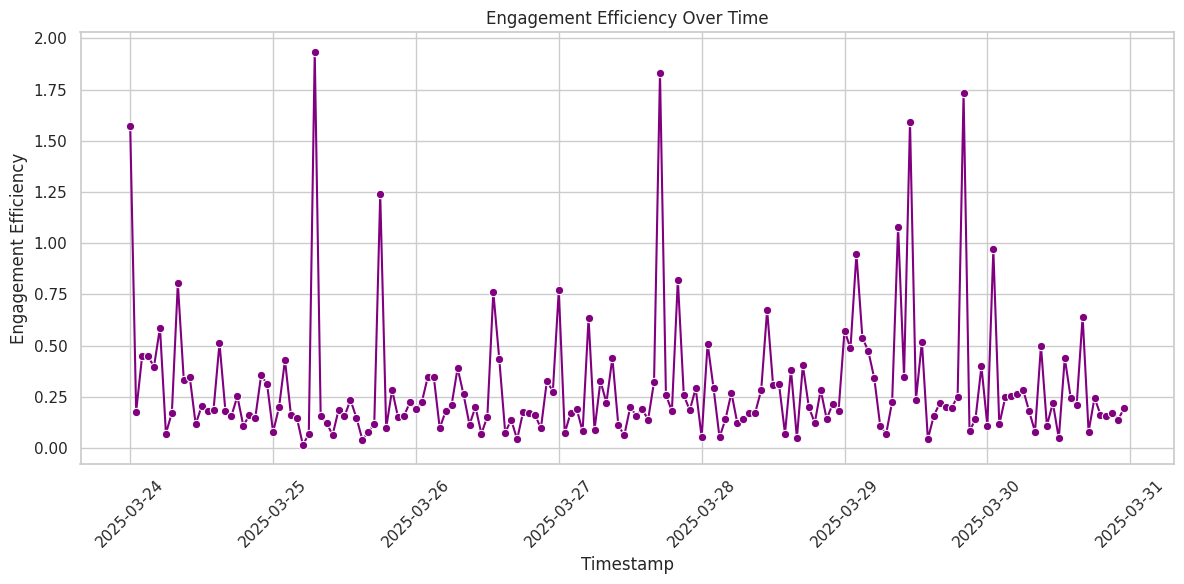

In [61]:
# Calculate engagement efficiency
df['Engagement Efficiency'] = (df['Likes'] + df['Comments']) / df['Views']

# Find the timestamps with the highest engagement efficiency
top_efficiency = df.sort_values(by='Engagement Efficiency', ascending=False).head(5)

print("Top 5 Timestamps with Highest Engagement Efficiency:")
print(top_efficiency[['Timestamp', 'Engagement Efficiency']])

# Plot engagement efficiency over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Timestamp', y='Engagement Efficiency', marker='o', color='purple')
plt.title('Engagement Efficiency Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Engagement Efficiency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Timestamp Had the Highest Engagement

In [62]:
# Calculate total engagement for each timestamp
df['Total Engagement'] = df['Views'] + df['Likes'] + df['Comments']

# Find the timestamp with the highest engagement
max_engagement = df.loc[df['Total Engagement'].idxmax()]

print("Timestamp with Highest Engagement:")
print(max_engagement[['Timestamp', 'Views', 'Likes', 'Comments', 'Total Engagement']])

Timestamp with Highest Engagement:
Timestamp           2025-03-30 21:00:00
Views                               731
Likes                               120
Comments                              6
Total Engagement                    857
Name: 165, dtype: object


#**Usage**

##Which app has the highest average daily usage time?
This question helps identify the app where users spend the most time daily.

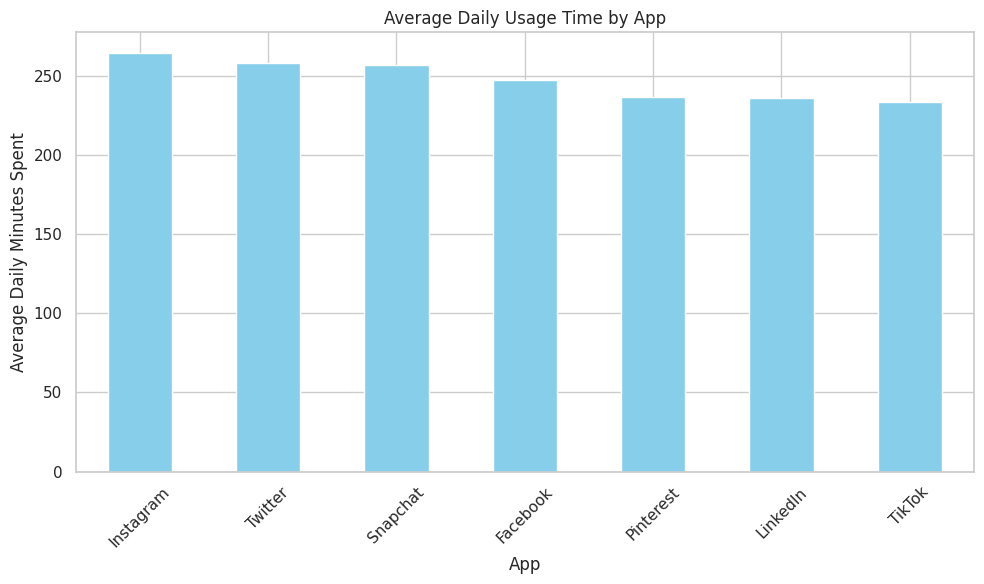

In [79]:
# Query the usage table
conn = sqlite3.connect("dataset.db")
query = "SELECT * FROM usage"
df = pd.read_sql_query(query, conn)

# Group by app and calculate the average daily usage time
avg_usage_time = df.groupby('App')['Daily_Minutes_Spent'].mean().sort_values(ascending=False)

# Plot the average daily usage time
plt.figure(figsize=(10, 6))
avg_usage_time.plot(kind='bar', color='skyblue')
plt.title('Average Daily Usage Time by App')
plt.xlabel('App')
plt.ylabel('Average Daily Minutes Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Which app has the highest engagement efficiency (likes + follows per minute spent)?
This question measures how efficiently apps convert time spent into engagement.

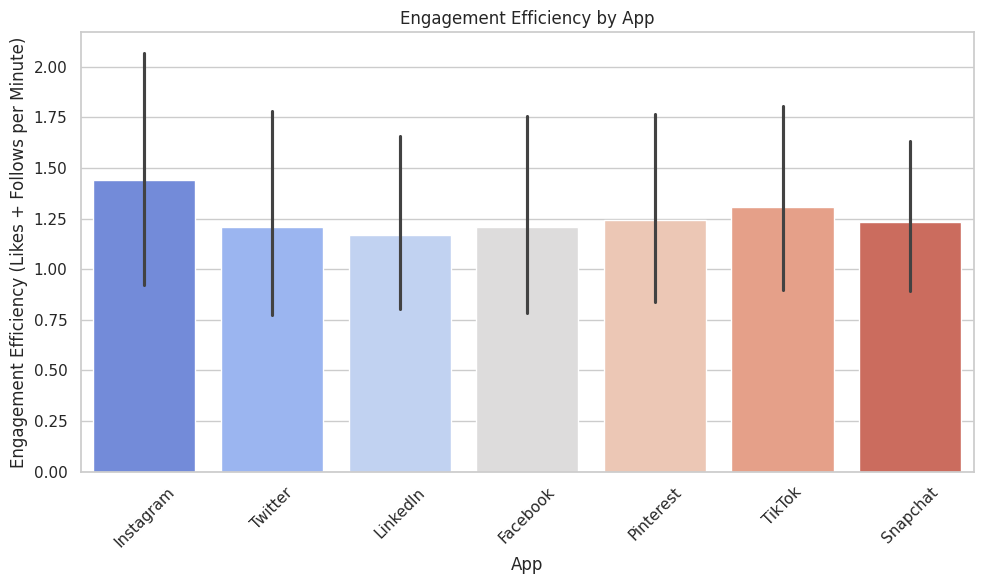

In [74]:
# Calculate engagement efficiency
df['Engagement_Efficiency'] = (df['Likes_Per_Day'] + df['Follows_Per_Day']) / df['Daily_Minutes_Spent']

# Sort by engagement efficiency
engagement_efficiency = df[['App', 'Engagement_Efficiency']].sort_values(by='Engagement_Efficiency', ascending=False)

# Plot engagement efficiency
plt.figure(figsize=(10, 6))
sns.barplot(data=engagement_efficiency, x='App', y='Engagement_Efficiency', hue='App', palette='coolwarm', dodge=False, legend=False) # Apply suggested changes
plt.title('Engagement Efficiency by App')
plt.xlabel('App')
plt.ylabel('Engagement Efficiency (Likes + Follows per Minute)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Which app has the highest number of posts per day?
This question identifies the app with the most active posting behavior.

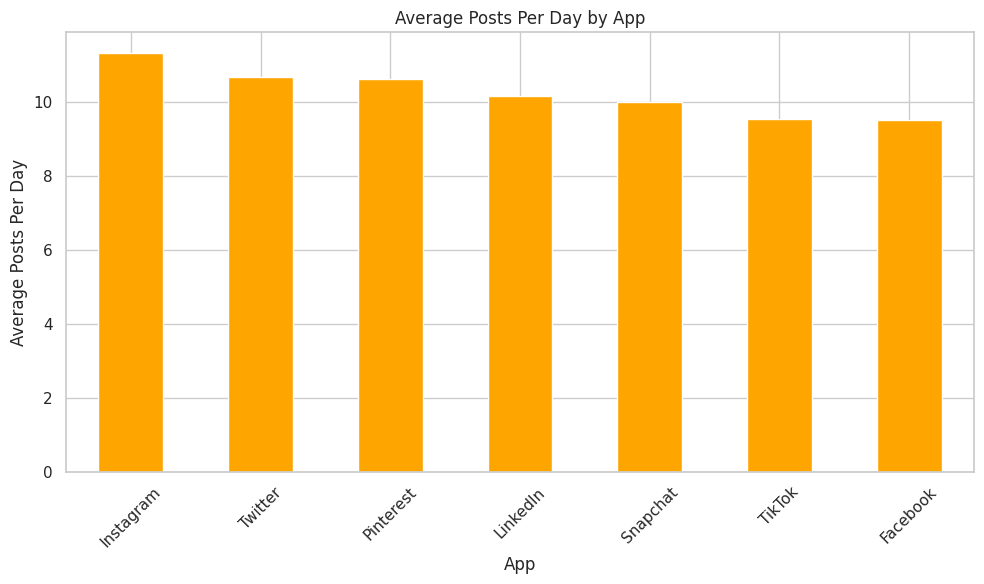

In [73]:
# Group by app and calculate the average posts per day
avg_posts_per_day = df.groupby('App')['Posts_Per_Day'].mean().sort_values(ascending=False)

# Plot the average posts per day
plt.figure(figsize=(10, 6))
avg_posts_per_day.plot(kind='bar', color='orange')
plt.title('Average Posts Per Day by App')
plt.xlabel('App')
plt.ylabel('Average Posts Per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##What is the correlation between time spent and engagement (likes and follows)?
This question helps understand the relationship between time spent on an app and engagement metrics.

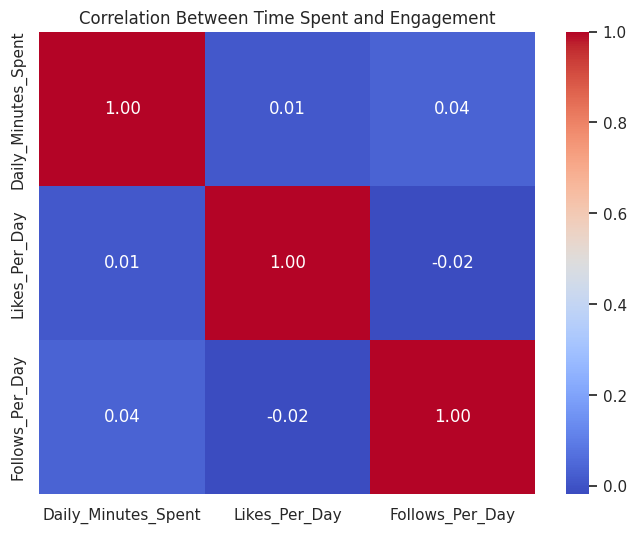

In [78]:
# Calculate the correlation matrix
correlation_matrix = df[['Daily_Minutes_Spent', 'Likes_Per_Day', 'Follows_Per_Day']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Time Spent and Engagement')
plt.show()

##Which app has the most follows per day?
This question identifies the app with the highest number of follows per day

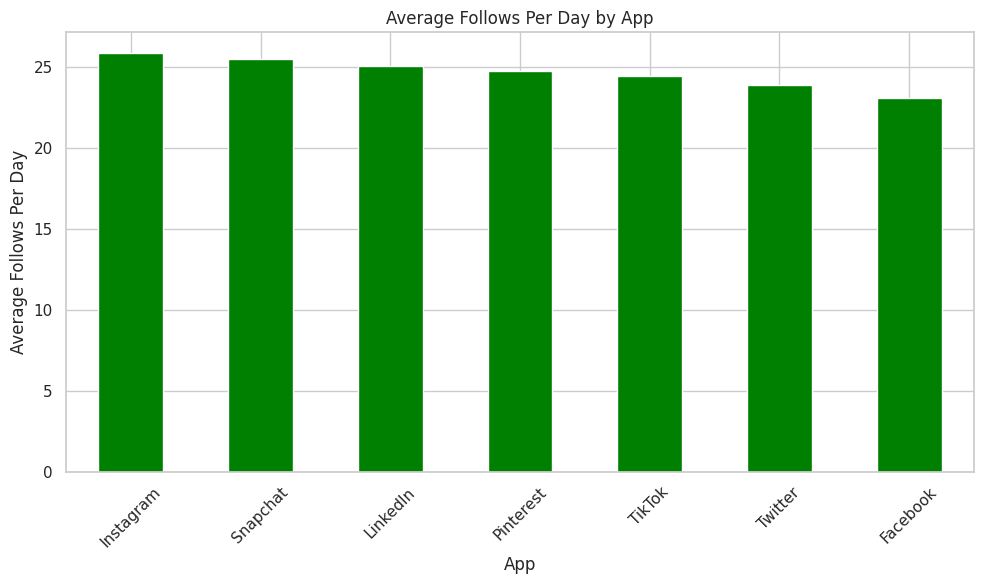

In [77]:
# Group by app and calculate the average follows per day
avg_follows_per_day = df.groupby('App')['Follows_Per_Day'].mean().sort_values(ascending=False)

# Plot the average follows per day
plt.figure(figsize=(10, 6))
avg_follows_per_day.plot(kind='bar', color='green')
plt.title('Average Follows Per Day by App')
plt.xlabel('App')
plt.ylabel('Average Follows Per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()